# Case Study 4.1 - Movies

<h1 style="color:red;">Note: If you close this notebook at any time, you will have to run all cells again upon re-opening it.</h1>

<h1 style="color:red;">Note: You may get different numerical results running the notebook different times. This is to be expected, you can just report whatever results you get.</h1>

# ADVANCED PYTHON

As this is an advanced version, we don't include a lot of code here. If you get stuck on a particular part, feel free to also use the beginner version in `beginnner_python.ipynb` to help you out.

# Identification Information

In [1]:
# YOUR NAME              = Xiaoyang Gong
# YOUR MITX PRO USERNAME = xiaoyang-gong
# YOUR MITX PRO E-MAIL   = shawn.xygong@gmail.com

# Setup

Run these cells to install all the packages you need to complete the remainder of the case study. This may take a few minutes, so please be patient.

In [1]:
!pip install --upgrade pip
!pip install surprise==0.1

     |████████████████████████████████| 1.5MB 1.7MB/s eta 0:00:01███████████████████████▌    | 1.3MB 1.7MB/s eta 0:00:01
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 6.4 MB 130 kB/s eta 0:00:01
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.0-cp36-cp36m-linux_x86_64.whl size=1713355 sha256=3ee69fe2525f715068305b40378c883ab92284d04ea38607a5af34683acf1bd2
  Stored in directory: /home/nbuser/.cache/pip/wheels/f3/97/d9/6a242e5e3bb89377d4f575af72d14af0d54ebd90a525a4c2f9
Successfully built scikit-surprise


Now, you must press **Kernel > Restart.** This allows the installation to take effect. Once you see the blue **Connected/Kernel ready** button in the top right, you are good to go.

# Import

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from surprise import Dataset, SVD, NormalPredictor, BaselineOnly, KNNBasic, NMF
from surprise.model_selection import cross_validate, KFold

# Data

Use the [`**Dataset.load_builtin**`](http://surprise.readthedocs.io/en/stable/dataset.html#surprise.dataset.Dataset.load_builtin) function to load the data.

In [3]:
# Your code here to load the data...
movie_lens = Dataset.load_builtin("ml-100k")
# Rating file as txt
movie_ratings = movie_lens.ratings_file

Dataset ml-100k could not be found. Do you want to download it? [Y/n] y
Trying to download dataset from http://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to C:\Users\test/.surprise_data/ml-100k


In [4]:
# Get the rating files
col_names = ['user_id', 'item_id', 'rating', 'timestamp']
df_movie = pd.read_table(movie_ratings, names = col_names)

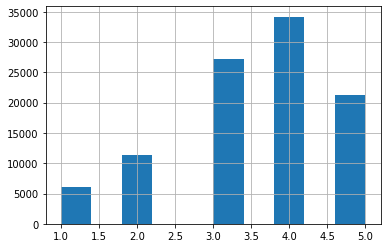

In [5]:
# First few lines of movies
df_movie.rating.hist()

In [6]:
# Total Number of Ratings
print("The total number of ratings available in the dataset is:", df_movie.rating.value_counts().sum())
print("The average rating is:", df_movie.rating.mean())
print("The median rating is:", df_movie.rating.median())
print("The Total Number of Movies:", df_movie.groupby("item_id").count().shape[0])

The total number of ratings available in the dataset is: 100000
The average rating is: 3.52986
The median rating is: 4.0
The Total Number of Movies: 1682


In [7]:
# The proportion of each review category
df_movie.rating.value_counts().sort_index() / df_movie.rating.value_counts().sum()

1    0.06110
2    0.11370
3    0.27145
4    0.34174
5    0.21201
Name: rating, dtype: float64

In [8]:
# Movies with most positive ratings and with least positive ratings
movie = df_movie.groupby('item_id')['rating'].agg([("average_rating", np.mean), ("rating_count", "count")])


In [9]:
# The worst rated movie with more than 10 ratings available
movie.loc[movie.rating_count >= 10].sort_values("average_rating").head()

,average_rating,rating_count
item_id,,
424,1.315789,19
669,1.615385,13
440,1.642857,14
1087,1.700000,10
758,1.714286,21


In [10]:
# The best rated movie with more than 10 ratings available
movie.loc[movie.rating_count >= 10].sort_values("average_rating", ascending = False).head()

,average_rating,rating_count
item_id,,
408,4.491071,112
318,4.466443,298
169,4.466102,118
483,4.456790,243
114,4.447761,67


Text(0.5, 1.0, 'Histogram of Average Rating of Movies')

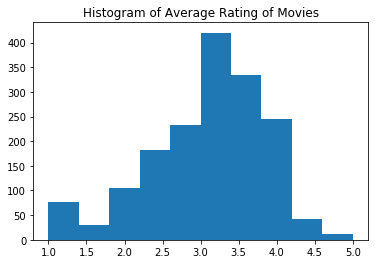

In [11]:
# Histogram of ratings
plt.hist(movie.average_rating)
plt.title("Histogram of Average Rating of Movies")

Text(0.5, 1.0, 'Histogram of Rating Count of Movies')

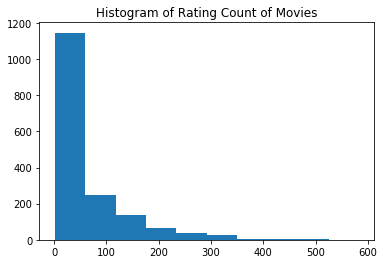

In [12]:
# Histogram of count of ratings
plt.hist(movie.rating_count)
plt.title("Histogram of Rating Count of Movies")

<h1 style="color:red;">QUESTION 1: DATA ANALYSIS</h1>

**Describe the dataset. How many ratings are in the dataset? How would you describe the distribution of ratings? Is there anything else we should observe? Make sure the histogram is visible in the notebook.**

There are 100000 ratings in the dataset. The distribution of the ratings is left skewed, the proportion of the lower ratings are significantly lower than that of ratings higher than 3. From the histogram, we can see that the users tend to give movie a higher rating than give movie a lower rating. The average number of ratings is roughly normally distributed, while the popularity of the movies is highly imbalanced and displays a poisson distribution, with more than 1000 movies recevied less than 100 ratings.

# Model 1: Random

In [13]:
# Create model using NormalPredictor() class
random_model = NormalPredictor()

In [14]:
# Train on data using cross-validation with k=5 folds, measuring the RMSE
# See the cross_validate function that we have imported above
# http://surprise.readthedocs.io/en/stable/model_selection.html#surprise.model_selection.validation.cross_validate

cross_validate(random_model, movie_lens, measures=['RMSE'], cv=5, verbose=True)


Evaluating RMSE of algorithm NormalPredictor on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.5173  1.5277  1.5225  1.5128  1.5138  1.5188  0.0056  
Fit time          0.10    0.12    0.12    0.13    0.14    0.12    0.02    
Test time         0.15    0.11    0.17    0.15    0.10    0.14    0.03    


{'test_rmse': array([1.51728271, 1.52767966, 1.52252512, 1.51275583, 1.51384258]),
 'fit_time': (0.09574365615844727,
  0.11967968940734863,
  0.1246957778930664,
  0.13364291191101074,
  0.1426253318786621),
 'test_time': (0.14763998985290527,
  0.10568118095397949,
  0.1685476303100586,
  0.15256357192993164,
  0.1047205924987793)}

# Model 2: User-Based Collaborative Filtering

In [15]:
# Create model using KNNBasic() class
# See the sim_options parameter to determine the user/item similarity calculation of the model
# http://surprise.readthedocs.io/en/stable/prediction_algorithms.html#similarity-measures-configuration
knn_basic_user = KNNBasic(sim_options = {'user_based': True})

In [16]:
# Train using same cross validation code as above
cross_validate(knn_basic_user, movie_lens, measures = ['RMSE'], cv = 5, verbose = True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9780  0.9774  0.9706  0.9859  0.9814  0.9787  0.0050  
Fit time          0.48    0.46    0.49    0.48    0.45    0.47    0.02    
Test time         2.84    3.08    2.94    2.89    3.03    2.95    0.09    


{'test_rmse': array([0.97802669, 0.97737323, 0.97059944, 0.98590277, 0.98140836]),
 'fit_time': (0.4817683696746826,
  0.4588510990142822,
  0.48969006538391113,
  0.47875404357910156,
  0.4487326145172119),
 'test_time': (2.8394522666931152,
  3.0757291316986084,
  2.9401702880859375,
  2.885282039642334,
  3.0319249629974365)}

# Model 3: Item-Based Collaborative Filtering

In [17]:
# Create model using KNNBasic() class
# Make sure you change the sim_options parameter from above
knn_basic_item = KNNBasic(sim_options = {'user_based': False})

In [18]:
# Train using same cross validation code as above
cross_validate(knn_basic_item, movie_lens, measures = ['RMSE'], cv = 5, verbose = True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9733  0.9777  0.9741  0.9752  0.9723  0.9745  0.0018  
Fit time          0.75    0.75    0.72    0.71    0.66    0.72    0.03    
Test time         3.84    3.60    3.70    3.67    3.88    3.74    0.11    


{'test_rmse': array([0.97334917, 0.97765625, 0.9740762 , 0.97518729, 0.97233798]),
 'fit_time': (0.7450056076049805,
  0.7490768432617188,
  0.7174453735351562,
  0.7106754779815674,
  0.6586639881134033),
 'test_time': (3.8353543281555176,
  3.6023497581481934,
  3.6979196071624756,
  3.668292760848999,
  3.8840606212615967)}

<h1 style="color:red;">QUESTION 2: COLLABORATIVE FILTERING MODELS</h1>

**Compare the results from the user-user and item-item models. How do they compare to each other? How do they compare to our original "random" model? Can you provide any intuition as to why the results came out the way they did?**

Both method achieved similar results, but item based collaborative filtering achieveed slightly better average RMSE. They both siginificantly outperformed the baseline model in this case. The main reason that item based collaborative filter achieved higher accuracy is that the the number of per item (movie) rating is higher than the number of ratings per user, hence there is more overlap between each movie than between users, which enables the algorithm to better estimate the "true" similarity between each movies.

# Model 4: Matrix Factorization

In [19]:
# Create model using SVD() class
matrix_factor = SVD()

In [20]:
# Train using same cross validation code as above
cross_validate(matrix_factor, movie_lens, measures = ['RMSE'], cv = 5, verbose = True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9351  0.9402  0.9362  0.9378  0.9293  0.9357  0.0036  
Fit time          4.48    4.72    5.25    5.03    5.47    4.99    0.35    
Test time         0.18    0.12    0.21    0.15    0.25    0.18    0.04    


{'test_rmse': array([0.93509079, 0.94017282, 0.93620657, 0.93775281, 0.92929222]),
 'fit_time': (4.483702898025513,
  4.717343330383301,
  5.246633052825928,
  5.030645132064819,
  5.467867374420166),
 'test_time': (0.1805100440979004,
  0.1226356029510498,
  0.21044063568115234,
  0.14963126182556152,
  0.2471637725830078)}

<h1 style="color:red;">QUESTION 3: MATRIX FACTORIZATION MODEL</h1>

**The matrix factorization model is different from the collaborative filtering models. Briefly describe this difference. Also, compare the RMSE again. Does it improve? Can you offer any reasoning as to why that might be?**

The matrix factorization model outperformed both collaborative filter models in the previous section. The key difference between matrix factorization and item-item and user-user collaborative filtering is the amount of training time and testing time required. User-user and item-item collaborative filtering primarily based on calculating the inner product to measure the similarity between users or items, while matrix factorization method utilizes singular value decomposition algorithms to distinguish each user-movie pair. Thus for matrix factorization, the calculation complexity is mainly from calculating the matrix representation of each user-item pair, hence fitting the model, while calculating the inner product is significant less computationally expensive than SVD algorithm.

For testing, however, the SVD algorithm only sums the resulting matrix to determine each user's preference for movies, which is much simpler than calculating the similarity and compare the similarity between each user/item in the user-user and item-item based collaborative filtering case.

The RMSE of the matrix factorization method also improved from those of collaborative filtering methods. The potential reason behind this performance is that the matrix factorization method can successfullly incorporate each user group's taste profile into the consideration, instead of simply based on the similarity between users or items.

# Precision and Recall @ `k`

We now want to compute the precision and recall for 2 values of `k`: 5 and 10. We have provided some code here to help you do that.

First, we define a function that takes in some predictions, a value of `k` and a threshold parameter. This code is adapted from [here](http://surprise.readthedocs.io/en/stable/FAQ.html?highlight=precision#how-to-compute-precision-k-and-recall-k).

In [21]:
def precision_recall_at_k(predictions, k=10, threshold=3.5):
    '''Return precision and recall at k metrics for each user.'''

    # First map the predictions to each user.
    user_est_true = dict()
    for uid, _, true_r, est, _ in predictions:
        current = user_est_true.get(uid, list())
        current.append((est, true_r))
        user_est_true[uid] = current

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1

        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

    return precisions, recalls

Next, we compute the precision and recall at `k` = 5 and 10 for each of our 4 models. We use 5-fold cross validation again to average the results across the entire dataseat.

Please note that this will take some time to compute.

<h1 style="color:red;">QUESTION 4: PRECISION/RECALL</h1>

**Compute the precision and recall, for each of the 4 models, at `k` = 5 and 10. This is 2 x 2 x 4 = 16 numerical values. Do you note anything interesting about these values? Anything differerent from the RMSE values you computed above?**

Some code is required for this question.

In [22]:
# Use the function above to compute the 16 numerical values requested above
# See the test() function to get the predictions input to the function
# http://surprise.readthedocs.io/en/stable/algobase.html#surprise.prediction_algorithms.algo_base.AlgoBase.test

# Create a list of k folds
K = [5, 10]

models = [random_model, knn_basic_user, knn_basic_item, matrix_factor]

kf = KFold()

for k in K:
    for model in models:
        print(f'>>> k={k}, model={model.__class__.__name__}')
        # Run folder and take average
        p = []
        r = []
        f1 = []
        for trainset, testset in kf.split(movie_lens):
            model.fit(trainset)
            predictions = model.test(testset, verbose=False)
            precisions, recalls = precision_recall_at_k(predictions, k=k, threshold=3.5)
            # Precision and recall can then be averaged over all users
            precision, recall = sum(prec for prec in precisions.values()) / len(precisions), sum(rec for rec in recalls.values()) / len(recalls)
            p.append(precision)
            r.append(recall)
            f1.append(2 * (precision * recall) / (precision + recall))
        
        print('>>> precision:', round(sum(p) / len(p), 3))
        print('>>> recall  :', round(sum(r) / len(r), 3))
        print('>>> f1-score  :', round(sum(f1) / len(f1), 3))
        print('\n')

print('\n\nPrecision and recall computation successful!')


>>> k=5, model=NormalPredictor
>>> precision: 0.588
>>> recall  : 0.342
>>> f1-score  : 0.433


>>> k=5, model=KNNBasic
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
>>> precision: 0.767
>>> recall  : 0.455
>>> f1-score  : 0.571


>>> k=5, model=KNNBasic
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
>>> precision: 0.816
>>> recall  : 0.393
>>> f1-score  : 0.53

If we decide to recommend movies if the prediction of the ratings are above 3.5 and evaluate the models based on precision and recall, we can see that some the performance metrics now indicates some other models are better than the matrix factorization algorithm, even the latter one has lower RMSE. In both k=5 and k=10 cases, the user based collaborative filtering performed the best among all models with a relatively balanced precision and recall, and the highest F1 score, indicating the best balance between sensitivity and specificity.

#  Top-`n` Predictions

Finally, we can see what some of the actual movie ratings are for particular users, as outputs of our model.

Again, we define a helpful function.

In [23]:
def get_top_n(predictions, n=5):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    top_n = dict()
    for uid, iid, true_r, est, _ in predictions:
        current = top_n.get(uid, [])
        current.append((iid, est))
        top_n[uid] = current

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

Then, we call this function on each of our models, first training on **all** the data we have available, then predicting on the remaining, missing data. We use `n`=5 here, but you can pick any reasonable value of `n` you would like.

This may take some time to compute, so be patient.

Hint: Use [`**Dataset.build_full_trainset**`](http://surprise.readthedocs.io/en/stable/dataset.html#surprise.dataset.DatasetAutoFolds.build_full_trainset) to get the full trainset from the data. Then call [`**Trainset.build_anti_testset**`](http://surprise.readthedocs.io/en/stable/trainset.html#surprise.Trainset.build_anti_testset) to get the testset out. Finally, `fit` on the trainset, `test` on the testset, then pass that result to our `get_top_n` function.

In [24]:
trainset = movie_lens.build_full_trainset()
testset = trainset.build_anti_testset()

<h1 style="color:red;">QUESTION 5: TOP N PREDICTIONS</h1>

**Do the top n predictions that you received make sense? What is the rating value (1-5) of these predictions? How could you use these predictions in the real-world if you were trying to build a generic content recommender system for a company?**

Some code is required for this question.

In [25]:
# Use the function and hints above to give the top-n predictions for a given user, for a reasonable value of n
for model in models:
    model.fit(trainset)
    predictions = model.test(testset)
    top_n = get_top_n(predictions, n=5)
    # Print the first one
    user = list(top_n.keys())[0]
    print(f'model: {model}, {user}: {top_n[user]}')

model: <surprise.prediction_algorithms.random_pred.NormalPredictor object at 0x0000029F2AE110C8>, 196: [('465', 5), ('193', 5), ('327', 5), ('26', 5), ('366', 5)]
Computing the msd similarity matrix...
Done computing similarity matrix.
model: <surprise.prediction_algorithms.knns.KNNBasic object at 0x0000029F2D30B188>, 196: [('1189', 5), ('1500', 5), ('814', 5), ('1536', 5), ('1599', 5)]
Computing the msd similarity matrix...
Done computing similarity matrix.
model: <surprise.prediction_algorithms.knns.KNNBasic object at 0x0000029F2D899548>, 196: [('1414', 4.666666666666667), ('1309', 4.5), ('1310', 4.5), ('1675', 4.333333333333333), ('1676', 4.3076923076923075)]
model: <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x0000029F2DF44648>, 196: [('50', 4.562287982060539), ('136', 4.520280584120067), ('134', 4.519573187024133), ('114', 4.492207768794184), ('199', 4.467686196335827)]


The top n predictions returns makes sense, the rating value of these prediction are the near 5 since the top prediction returns the highest rating predictions for each user. These results could be very useful in building a recommendation system, since it provide the 5 most content the users most likely to prefer, based on the top 5 results, the company can easily recommend the content based on user's preferences. Additionally, as the company recommends the top 5 results for the users, the company can significantly the model accuracy risk of not recommending the right content if only recommending 1 result to the users.

<hr>

Great job! Now, make sure you check out the **Conclusion** section of the [instruction manual](https://courses.edx.org/asset-v1:MITxPRO+DSx+2T2018+type@asset+block@4.1_instruction_manual.html) to wrap up this case study properly.